In [76]:
import pandas as pd
from collections import defaultdict,OrderedDict
def change_time_format(time):
    time = time.replace("年","-").replace("月","-").replace("日","").replace("時",":").replace("分",":").replace("秒","")
    year = int(time.split("-")[0])
    time = time.replace(str(year),str(year+1911))
    time = time.split()
    ac_time = time[1].split(":")
    if int(ac_time[1]) > 0:
        ac_time[1] = "00"
        ac_time[0] = str(int(ac_time[0])+1)
    if len(ac_time[0]) < 2:
        ac_time[0] = "0" + ac_time[0]
    if ac_time[0] == '24':
        return time[0]+" "+"23"+":00:00"
    else:
        return time[0]+" "+ac_time[0]+":00:00"

def get_weather_data(district):
    import os
    path = "data/weather/all_data"
    all_weather = {}
    for filename in os.listdir(path):
        all_weather[filename.replace(".csv","")] = pd.read_csv(path+"/"+filename)
    DataWithWeather = []
    # 雨量
    all_rain =  defaultdict(list)
    # 風速
    all_WS = defaultdict(list)
    # 最大陣風
    all_WSGust = defaultdict(list)
    T_time = []
    for i in district["發生時間"].to_list():
        # print(change_time_format(i))
        T_time.append(change_time_format(i))
    A1_rain = defaultdict()
    A2_rain = defaultdict()
    A1_WS = defaultdict()
    A2_WS = defaultdict()
    A1_WSGust = defaultdict()
    A2_WSGust = defaultdict()
    count = 0
    err = 0
    for i in range(0,len(district["測站"].to_list())):
        try:
            a = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Unnamed: 18"].to_list().index(T_time[i])
            precp = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list()[a]
            if precp == "t" or precp == "T" or precp == "&" or precp == "X":
                precp = float(0.0)
            WS = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list()[a]
            if WS == "/" or WS == "X" or WS == "...":
                WS = float(0.0)
            WSGust = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list()[a]
            if WSGust == "..." or WSGust == "X":
                WSGust = float(0.0)
            all_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
            all_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
            all_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
            precp = float(precp)
            WS = float(WS)
            WSGust = float(WSGust)
            if district["種類"].to_list()[i] == "A1":
                if precp not in A1_rain.keys():
                    A1_rain[precp] = 1
                else:
                    A1_rain[precp] += 1
            else:
                if precp not in A2_rain.keys():
                    A2_rain[precp] = 1
                else:
                    A2_rain[precp] += 1
            if district["種類"].to_list()[i] == "A1":
                if WS not in A1_WS.keys():
                    A1_WS[WS] = 1
                else:
                    A1_WS[WS] += 1
            else:
                if WS not in A2_WS.keys():
                    A2_WS[WS] = 1
                else:
                    A2_WS[WS] += 1
            if district["種類"].to_list()[i] == "A1":
                if WSGust not in A1_WSGust.keys():
                    A1_WSGust[WSGust] = 1
                else:
                    A1_WSGust[WSGust] += 1
            else:
                if precp not in A2_WSGust.keys():
                    A2_WSGust[WSGust] = 1
                else:
                    A2_WSGust[WSGust] += 1
            count += 1
        except:
            err += 1
    print(count)
    print(err)
    return A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust

In [64]:
# A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust = get_weather_data(all_Data)

In [65]:
Taipei =  pd.read_csv("data/updated/cat_Taipei.csv")
New_Taipei =  pd.read_csv("data/updated/cat_NewTaipei.csv")
Taoyuan = pd.read_csv("data/updated/cat_Taoyuan.csv")
Tainan = pd.read_csv("data/updated/cat_Tainan.csv")
Kaohsiung = pd.read_csv("data/updated/cat_Kaohsiung.csv")
Taichung =  pd.read_csv("data/updated/cat_Taichung.csv")

In [66]:
Taipei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23046 entries, 0 to 23045
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23046 non-null  int64  
 1   發生時間        23046 non-null  object 
 2   發生地點        23046 non-null  object 
 3   死亡受傷人數      23046 non-null  object 
 4   車種          23046 non-null  object 
 5   經度          23046 non-null  float64
 6   緯度          23046 non-null  float64
 7   種類          23046 non-null  object 
 8   測站          23046 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.6+ MB


### 台北

In [215]:
def new_draw(A1_data,A2_data,x_name,y_name):
    A1_point_x = []
    A1_point_y = []
    A2_point_x = []
    A2_point_y = []
    for i in sorted(A1_data.keys()):
        A1_point_x.append((i))
        A1_point_y.append(A1_data[i])
    for i in sorted(A2_data.keys()):
        A2_point_x.append((i))
        A2_point_y.append(A2_data[i])
    print(A2_point_x)
    print(A2_point_y)
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    # font = FontProperties(fname=r"/Users/yangsicheng/Library/Fonts/SimHei.ttf", size=12)
    # plt.figure(figsize=(20, 20))
    # plt.title('test')  # 折线图标题
    # plt.xlabel('prep')  # x轴标题
    # plt.ylabel('times')  # y轴标题
    from brokenaxes import brokenaxes
    # brokenaxes(ylims=((0,800),(20000,21000)), hspace=0.5, despine = False).plot(A2_point, marker='x', markersize=30)
    # brokenaxes(ylims=((0,10),(70,80)), hspace=.03, despine = False).plot(A1_point, marker='o', markersize=3)  # 绘制折线图，添加数据点，设置点的大小
    # bax = brokenaxes(xlims = [(0,95)],ylims=((0,800),(20800,21000)), hspace=.05, despine = False)
    # bax.plot(A2_point, marker='o', markersize=3,) 
    # # plt.
    # bax.plot(A1_point, marker='x', markersize=3) 

    fig = plt.figure(dpi=300)
    bax = brokenaxes(xlims=[(0, 100)], ylims=((0, 800), (20800, 21000)), hspace=0.25, despine=False, diag_color='r')
    bax.plot(A2_point_x,A2_point_y)
    plt.show()
    # plt.xlabel(x_name, fontproperties=font) # x軸的名稱
    # plt.ylabel(y_name, fontproperties=font) # y軸的名稱

In [ ]:
A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust  = get_weather_data(Taipei)
# new_draw(A1_rain, A2_rain,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
# new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
# new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.3, 2.5, 2.6, 2.9, 3.0, 3.3, 3.4, 3.5, 4.0, 4.2, 4.5, 5.0, 5.3, 5.5, 5.8, 6.0, 6.5, 7.0, 7.2, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 11.8, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 22.5, 23.0, 23.5, 24.0, 24.1, 24.5, 25.5, 27.5, 28.5, 29.0, 30.0, 31.0, 32.5, 33.0, 34.0, 35.5, 38.0, 40.0, 43.5, 50.0, 63.0, 64.5, 67.5, 92.9]
[20518, 62, 38, 29, 30, 725, 23, 14, 14, 11, 359, 10, 6, 2, 3, 208, 4, 4, 2, 2, 167, 1, 2, 120, 1, 1, 80, 1, 1, 61, 68, 2, 48, 44, 2, 27, 1, 27, 13, 25, 1, 20, 16, 9, 10, 17, 5, 7, 6, 7, 2, 3, 1, 10, 7, 4, 4, 6, 3, 3, 2, 3, 1, 4, 5, 1, 3, 4, 2, 4, 1, 1, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1]


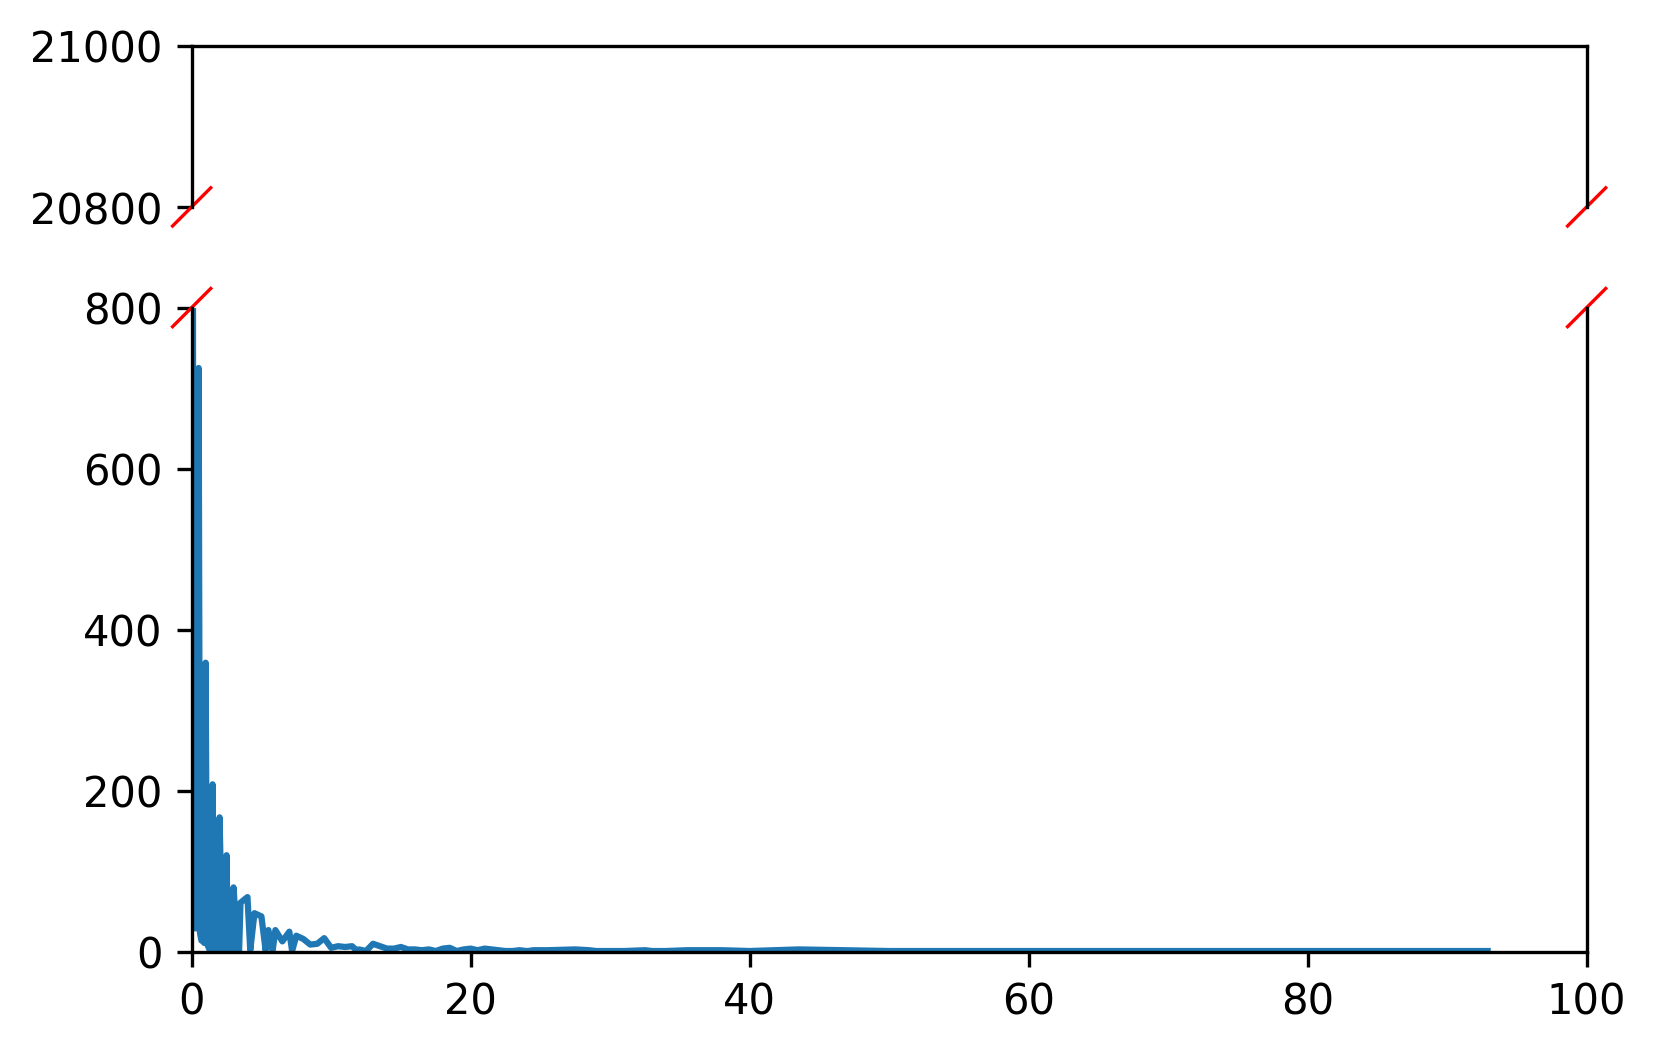

In [216]:
new_draw(A1_rain, A2_rain,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")

### 新北

In [69]:
A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust  = get_weather_data(New_Taipei)
# new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
# new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
# new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")
print(A1_rain)
print(A2_rain)

34926
1856
defaultdict(None, {'0.5': 4, '0.0': 154, '13.0': 1, '4.0': 1, '4.5': 2, '6.0': 1, '10.0': 1})
defaultdict(None, {'0.0': 33002, '0.2': 32, '5.5': 52, '1.5': 367, '0.1': 20, '0.5': 1149, '3.0': 129, '1.0': 602, '0.3': 16, '0.4': 9, '2.0': 259, '4.0': 96, '4.5': 84, '2.5': 195, '5.0': 61, '3.5': 95, '6.0': 28, '0.7': 1, '1.6': 1, '0.8': 8, '1.7': 1, '2.9': 1, '0.9': 2, '1.3': 3, '6.5': 25, '7.0': 30, '9.0': 24, '12.0': 5, '8.0': 15, '9.5': 16, '7.5': 23, '8.5': 18, '19.0': 3, '23.0': 2, '18.0': 3, '17.5': 5, '1.2': 1, '10.5': 18, '10.0': 19, '0.6': 4, '17.0': 7, '21.5': 2, '31.0': 2, '13.0': 16, '33.0': 1, '36.5': 2, '14.0': 7, '41.0': 1, '20.5': 3, '23.5': 1, '34.5': 1, '66.0': 1, '18.5': 8, '15.0': 5, '35.0': 1, '44.5': 1, '62.5': 1, '12.5': 2, '28.5': 1, '14.5': 8, '40.5': 1, '25.5': 1, '35.5': 3, '16.5': 10, '21.0': 3, '7.2': 1, '20.0': 1, '22.5': 2, '11.0': 9, '16.0': 4, '13.5': 9, '11.5': 2, '26.0': 6, '43.0': 1, '24.0': 6, '22.0': 3, '27.0': 1, '34.0': 1, '28.0': 1, '38.

### 桃園

In [70]:
A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust = get_weather_data(Taoyuan)
# new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
# new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
# new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")
print(A1_rain)
print(A2_rain)

42577
517
defaultdict(None, {'0.0': 141, '0.5': 7, '1.0': 2, '1.5': 1, '3.5': 1, '4.5': 1, '2.0': 3, '2.5': 1})
defaultdict(None, {'0.0': 38970, '0.5': 1381, '1.0': 583, '3.5': 119, '2.0': 310, '3.0': 136, '1.5': 363, '2.5': 198, '0.1': 3, '4.0': 122, '4.5': 105, '5.0': 56, '5.5': 54, '7.0': 31, '6.0': 37, '6.5': 25, '9.5': 24, '7.5': 32, '8.5': 11, '0.2': 4, '10.0': 18, '11.0': 16, '2.7': 1, '1.7': 2, '8.0': 24, '14.5': 14, '1.2': 2, '0.7': 2, '9.0': 20, '18.5': 4, '12.0': 10, '10.5': 1, '13.5': 8, '19.5': 3, '34.5': 2, '24.5': 3, '15.5': 3, '20.5': 2, '48.7': 1, '26.5': 3, '36.0': 2, '36.5': 3, '26.0': 9, '34.0': 1, '25.0': 3, '27.0': 4, '0.3': 3, '21.0': 3, '35.5': 1, '50.0': 1, '20.0': 6, '41.0': 1, '24.0': 7, '12.8': 1, '39.0': 1, '31.5': 1, '0.6': 1, '17.5': 6, '22.5': 3, '37.0': 5, '32.0': 2, '23.5': 2, '21.5': 3, '25.5': 2, '0.8': 3, '12.5': 4, '16.0': 5, '11.5': 8, '11.2': 1, '9.6': 2, '30.0': 1, '29.5': 4, '32.5': 2, '35.0': 2, '16.5': 1, '44.0': 1, '14.0': 2, '43.5': 1, '125

### 台南

In [71]:
A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust  = get_weather_data(Tainan)
# new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
# new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
# new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")
print(A1_rain)
print(A2_rain)

33548
5764
defaultdict(None, {'0.0': 178, '0.5': 2, '11.5': 1, '4.0': 1, '1.0': 1, '2.5': 1})
defaultdict(None, {'0.0': 36680, '0.5': 792, '5.0': 37, '1.0': 300, '3.5': 67, '2.5': 127, '1.5': 213, '7.0': 23, '6.0': 33, '2.0': 171, '7.5': 28, '4.0': 66, '10.0': 22, '3.0': 77, '4.5': 62, '6.5': 45, '12.0': 11, '11.0': 14, '8.0': 18, '28.0': 4, '8.5': 16, '5.5': 27, '22.5': 4, '10.5': 12, '9.0': 11, '9.5': 14, '21.0': 3, '24.0': 2, '18.5': 9, '23.5': 4, '35.0': 2, '33.5': 1, '13.5': 10, '12.5': 11, '17.5': 12, '18.0': 7, '15.5': 16, '34.0': 4, '28.5': 2, '11.5': 17, '20.0': 3, '13.0': 8, '14.0': 8, '27.0': 2, '22.0': 1, '25.5': 1, '26.5': 3, '35.5': 2, '27.5': 5, '24.5': 6, '15.0': 7, '16.0': 9, '17.0': 2, '54.5': 1, '19.5': 1, '14.5': 7, '20.5': 7, '21.5': 5, '32.5': 3, '26.0': 1, '44.0': 2, '39.5': 1, '58.5': 6, '42.5': 6, '31.0': 1, '23.0': 3, '80.5': 1, '50.5': 1, '19.0': 1, '36.5': 1, '36.0': 1, '59.5': 1, '29.0': 2, '56.0': 3, '54.0': 1, '45.0': 2, '16.5': 5, '48.5': 1, '41.0': 1, '

### 高雄

In [72]:
A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust  = get_weather_data(Kaohsiung)
# new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
# new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
# new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")
print(A1_rain)
print(A2_rain)

41684
1377
defaultdict(None, {'0.0': 196, '1.0': 2, '4.0': 2, '6.0': 1, '7.0': 2, '1.5': 1})
defaultdict(None, {'0.0': 40414, '0.5': 846, '0.6': 2, '1.5': 197, '1.0': 313, '2.0': 139, '5.5': 35, '7.0': 38, '4.0': 70, '9.0': 21, '16.0': 11, '2.5': 107, '3.5': 56, '3.0': 73, '6.0': 42, '4.5': 46, '24.5': 2, '6.5': 36, '7.5': 27, '13.5': 7, '16.5': 6, '27.0': 4, '15.0': 5, '5.0': 45, '18.0': 7, '34.5': 3, '9.5': 7, '43.0': 1, '10.5': 21, '8.5': 30, '10.0': 10, '8.0': 18, '13.0': 10, '0.3': 5, '44.5': 2, '26.0': 2, '41.5': 6, '19.5': 4, '17.5': 3, '30.0': 5, '28.5': 1, '27.5': 2, '23.5': 9, '20.5': 8, '11.5': 14, '40.0': 1, '24.0': 8, '26.5': 3, '28.0': 6, '17.0': 7, '36.0': 4, '25.0': 5, '46.0': 1, '14.5': 6, '12.0': 10, '29.5': 2, '14.0': 2, '15.5': 2, '22.5': 1, '19.0': 5, '21.5': 1, '33.5': 1, '32.0': 1, '20.0': 5, '37.5': 1, '34.0': 3, '18.5': 1, '11.0': 5, '12.5': 9, '31.5': 2, '22.0': 3, '31.0': 2, '73.5': 1, '80.0': 1, '77.0': 1, '66.5': 1, '40.5': 1, '38.0': 1, '0.2': 2, '2.2': 1,

### 台中

In [73]:
A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust = get_weather_data(Taichung)
# new_draw(all_rain,count_rain_dic,"每小時降雨量（mm/hr）","每小時車禍次數（次數/hr）")
# new_draw(all_WS, count_WS_dic,"每小時平均風速 (m/s)","每小時車禍次數（次數/hr）"),
# new_draw(all_WSGust, count_WSGust_dic,"每小時最大陣風 (m/s)","每小時車禍次數（次數/hr）")
print(A1_rain)
print(A2_rain)

38183
4949
defaultdict(None, {'0.0': 178, '1.0': 2, '0.5': 8, '2.5': 1, '10.0': 1, '4.5': 1, '1.5': 1, '3.0': 1})
defaultdict(None, {'0.0': 39790, '0.5': 945, '1.0': 436, '5.5': 39, '1.5': 310, '2.5': 171, '2.0': 217, '3.0': 140, '4.0': 71, '4.5': 79, '3.5': 108, '5.0': 40, '12.5': 17, '8.5': 15, '17.5': 3, '8.0': 19, '7.0': 20, '10.5': 10, '13.0': 10, '6.0': 39, '6.5': 34, '7.5': 38, '15.5': 12, '26.5': 1, '19.5': 4, '11.0': 11, '10.0': 13, '9.5': 33, '45.5': 2, '18.5': 8, '12.0': 10, '20.5': 1, '18.0': 13, '28.0': 5, '58.5': 2, '29.0': 5, '28.5': 5, '42.5': 1, '55.5': 2, '82.0': 1, '9.0': 15, '16.0': 4, '13.5': 14, '14.0': 9, '16.5': 5, '15.0': 6, '22.5': 2, '11.5': 13, '37.0': 3, '21.0': 5, '23.5': 2, '31.0': 2, '43.0': 2, '17.0': 4, '38.5': 4, '19.0': 1, '35.0': 1, '23.0': 4, '24.0': 4, '25.0': 1, '47.0': 2, '60.0': 1, '69.0': 2, '52.5': 2, '39.0': 2, '36.0': 1, '42.0': 2, '44.0': 1, '25.5': 1, '56.0': 1, '41.5': 1, '32.0': 1, '30.0': 6, '34.0': 2, '29.5': 1, '20.0': 1, '33.5': 2, 